# Przestrzeń poszukiwań

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from preprocess import folder_of_images_to_array_of_images
import pandas as pd

cat_folder_path = './Datasets/Petimages/Cat'
dog_folder_path = './Datasets/Petimages/Dog'
random_folder_path = './Datasets/data'

# Combine all image data
cats = folder_of_images_to_array_of_images(cat_folder_path, (160, 160))
dogs = folder_of_images_to_array_of_images(dog_folder_path, (160, 160))
random = folder_of_images_to_array_of_images(random_folder_path, (160, 160))

# Create labels
cats_label = ["Koty"] * cats.shape[0]
dogs_label = ["Psy"] * dogs.shape[0]
random_label = ["Losowe"] * random.shape[0]

# Combine data and labels
Search_space = np.vstack((cats, dogs, random))
labels = np.array(cats_label + dogs_label + random_label)

Search_space_flattened = Search_space.reshape(Search_space.shape[0], -1)

# Apply PCA
n_components = 3  # Adjust this value based on desired dimensionality
pca = PCA(n_components=n_components)
Search_space_pca = pca.fit_transform(Search_space_flattened)

# Combine PCA-transformed data with labels for analysis
pca_df = pd.DataFrame(Search_space_pca)
pca_df['Label'] = labels

# Debug: Check PCA results
print("PCA DataFrame:")
print(pca_df.head())

Błąd przy zdj 666.jpg: cannot identify image file './Datasets/Petimages/Cat\\666.jpg'
Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Cat\\Thumbs.db'
Błąd przy zdj 11702.jpg: cannot identify image file './Datasets/Petimages/Dog\\11702.jpg'


C:\Users\Bartosz Kebel\AppData\Roaming\Python\Python313\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Dog\\Thumbs.db'
PCA DataFrame:
              0             1            2 Label
0   3393.779893 -13477.191090  6860.101221  Koty
1 -12466.415218  -3385.992306  1878.023703  Koty
2  -3168.025388   1438.765041  3344.608318  Koty
3  15359.814765    526.316323 -4330.065954  Koty
4  -7218.512418   4257.539243  7558.168670  Koty


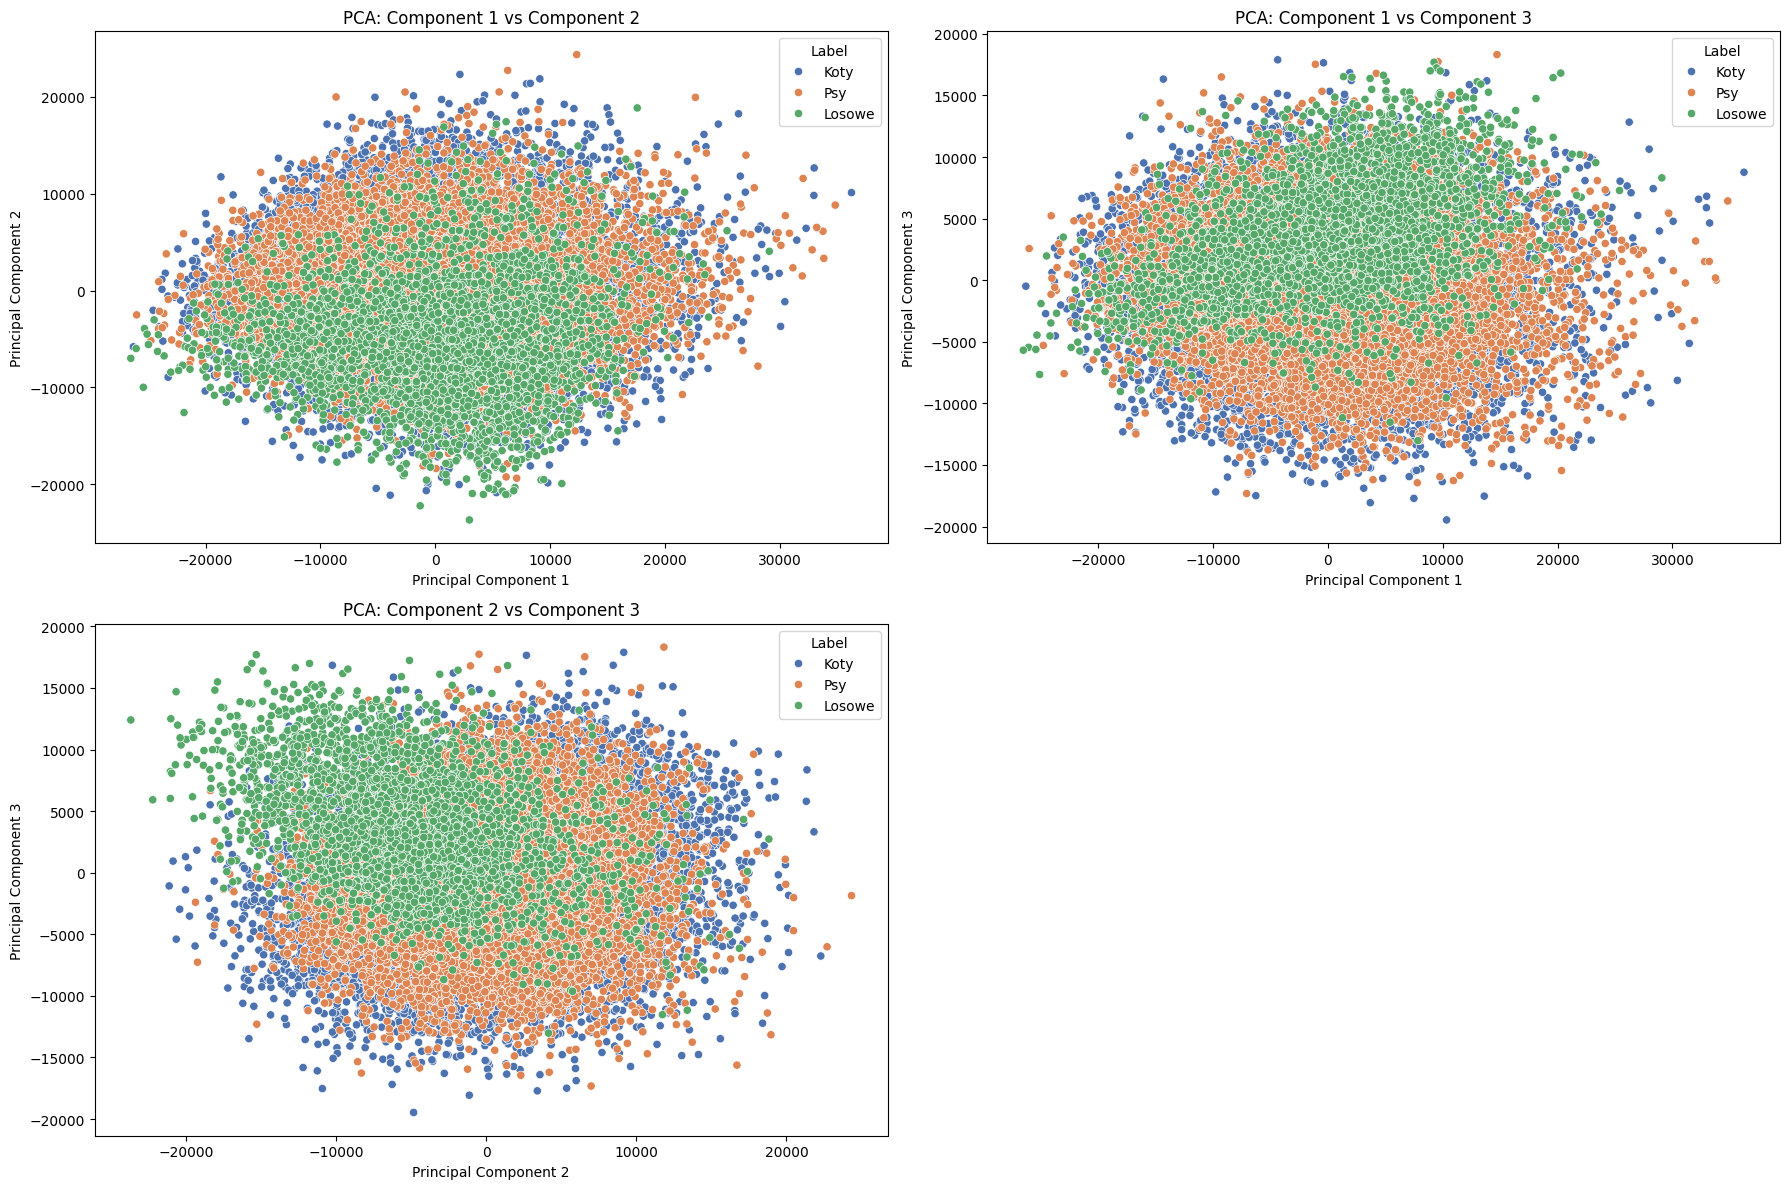

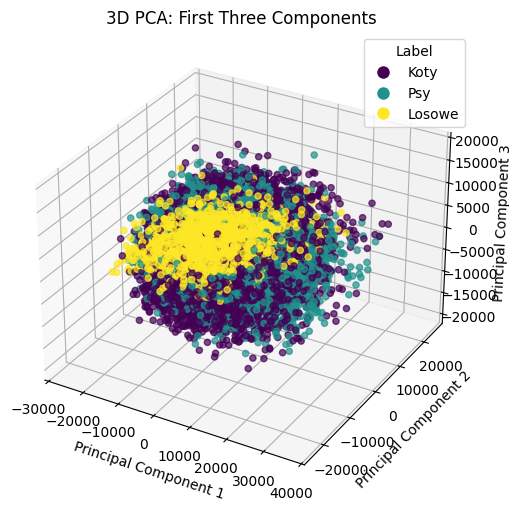

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Plot 2D Scatter Plots for the first three components
plt.figure(figsize=(18, 12))

# Plot 1: PC1 vs PC2
plt.subplot(2, 2, 1)
sns.scatterplot(
    x=pca_df[0],
    y=pca_df[1],
    hue=pca_df['Label'],
    palette="deep",
    legend="full"
)
plt.title("PCA: Component 1 vs Component 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot 2: PC1 vs PC3
plt.subplot(2, 2, 2)
sns.scatterplot(
    x=pca_df[0],
    y=pca_df[2],
    hue=pca_df['Label'],
    palette="deep",
    legend="full"
)
plt.title("PCA: Component 1 vs Component 3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

# Plot 3: PC2 vs PC3
plt.subplot(2, 2, 3)
sns.scatterplot(
    x=pca_df[1],
    y=pca_df[2],
    hue=pca_df['Label'],
    palette="deep",
    legend="full"
)
plt.title("PCA: Component 2 vs Component 3")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")

# Adjust layout
plt.tight_layout()

# 3D Scatter Plot for the First Three Components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    pca_df[0],
    pca_df[1],
    pca_df[2],
    c=[{'Koty': 0, 'Psy': 1, 'Losowe': 2}[label] for label in pca_df['Label']],
    cmap='viridis',
    alpha=0.7
)

# Add legend and labels
legend_labels = ['Koty', 'Psy', 'Losowe']
scatter_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markersize=10, markerfacecolor=plt.cm.viridis(i / 2)) for i, label in enumerate(legend_labels)]
ax.legend(handles=scatter_legend, title='Label')

ax.set_title("3D PCA: First Three Components")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Show plots
plt.show()


Błąd przy zdj 666.jpg: cannot identify image file './Datasets/Petimages/Cat\\666.jpg'
Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Cat\\Thumbs.db'
Błąd przy zdj 11702.jpg: cannot identify image file './Datasets/Petimages/Dog\\11702.jpg'


C:\Users\Bartosz Kebel\AppData\Roaming\Python\Python313\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Dog\\Thumbs.db'


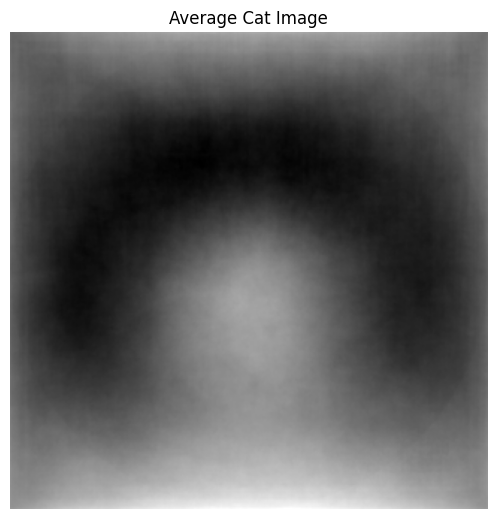

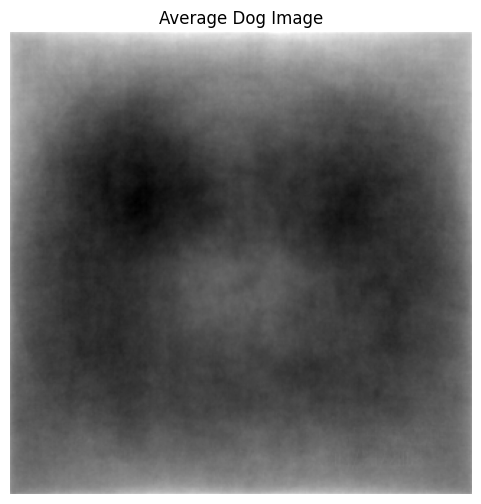

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from preprocess import folder_of_images_to_array_of_images

# Process Cats
cat_folder_path = './Datasets/Petimages/Cat'
cat_images = folder_of_images_to_array_of_images(cat_folder_path, (320, 320), True)
scaler_cat = StandardScaler()
cat_images_scaled = scaler_cat.fit_transform(cat_images)


# Compute the "average cat"
average_image_scaled_cat = scaler_cat.mean_
average_image_unscaled_cat = scaler_cat.inverse_transform(average_image_scaled_cat.reshape(1, -1))
average_image_reshaped_cat = average_image_unscaled_cat.flatten().reshape(320, 320)

# Process Dogs
dog_folder_path = './Datasets/Petimages/Dog'
dog_images = folder_of_images_to_array_of_images(dog_folder_path, (320, 320), True)
scaler_dog = StandardScaler()
dog_images_scaled = scaler_dog.fit_transform(dog_images)


# Compute the "average dog"
average_image_scaled_dog = scaler_dog.mean_
average_image_unscaled_dog = scaler_dog.inverse_transform(average_image_scaled_dog.reshape(1, -1))
average_image_reshaped_dog = average_image_unscaled_dog.flatten().reshape(320, 320)

# Plot Cats and Dogs on the Same Plot
plt.figure(figsize=(10, 6))


# Plot the Average Cat and Dog Images
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
plt.imshow(average_image_reshaped_cat, cmap='gray')
plt.title("Average Cat Image")
plt.axis('off')

# Show both plots
plt.tight_layout()
plt.show()

# Plot the Average Dog Image
plt.figure(figsize=(6, 6))
plt.imshow(average_image_reshaped_dog, cmap='gray')
plt.title("Average Dog Image")
plt.axis('off')
plt.show()



(żeby mieć dostęp do calculated_models uruchom KNN.py)

# KNN

In [1]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

knn1 = joblib.load('Models/calculated_models/knn1_model.joblib')
print('zładowałem k1')


X_test = np.load('Models/test_data/Knn_X_test.npy')
Y_test = np.load('Models/test_data/Knn_Y_test.npy')
print('zładowałem dane')

y1 = knn1.predict(X_test)


print(f'accuracy1: {accuracy_score(Y_test,y1)}')



zładowałem k1
zładowałem dane
accuracy1: 0.5258928571428572


In [2]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

knn5 = joblib.load('Models/calculated_models/knn5_model.joblib')
print('zładowałem k5')

X_test = np.load('Models/test_data/Knn_X_test.npy')
Y_test = np.load('Models/test_data/Knn_Y_test.npy')
print('zładowałem dane')

y5 = knn5.predict(X_test)

print(f'accuracy5: {accuracy_score(Y_test,y5)}')


zładowałem k5
zładowałem dane
accuracy5: 0.5482142857142858


In [3]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

knn10 = joblib.load('Models/calculated_models/knn10_model.joblib')
print('zładowałem k10')

X_test = np.load('Models/test_data/Knn_X_test.npy')
Y_test = np.load('Models/test_data/Knn_Y_test.npy')
print('zładowałem dane')

y10 = knn10.predict(X_test)

print(f'accuracy10: {accuracy_score(Y_test,y10)}')

zładowałem k10
accuracy10: 0.5455357142857142


Widać że KNN jest nie skuteczne 

# Logistic Regression

# XGBOOST